<a href="https://colab.research.google.com/github/rafaelrlima/cat-and-dog/blob/main/teste_transf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# teste_transf.ipynb




#### Motando o drive com os arquivos necessários

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Imports utilizados

In [ ]:
import os 
import fnmatch
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import cv2
import numpy as np


#### Separando os diretórios e carregando algumas variáveis

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/dog-and-cat'
#base_dir = './dog-and-cat/'
train_dir = os.path.join(base_dir, 'training_set/')
test_dir = os.path.join(base_dir, 'test_set')
validation_dir = os.path.join(base_dir, 'validation_set')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

width = 224
height = 224
dim = (width, height)

batch_size = 20
total_train = 8000
total_val = 1000
epochs = 10
NUM_CLASSES = 2

#### Obtendo as imagens do dataset para gerar as predições

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

test_generator = test_datagen.flow_from_directory( test_dir,  batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

validation_generator = validation_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'categorical', target_size = (224, 224))

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Carregando modelo treinado

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/transf.h5')

#### Avaliando o modelo

In [ ]:
score = model.evaluate(train_generator)
print('Training loss:', score)
score = model.evaluate(validation_generator)
print('Validation loss:', score)
score = model.evaluate(test_generator)
print('Test loss:', score)

400/400 [==============================] - 1705s 4s/step - loss: 0.1369 - acc: 0.9460
Training loss: [0.13691148161888123, 0.9459999799728394]
50/50 [==============================] - 190s 4s/step - loss: 0.1473 - acc: 0.9470
Validation loss: [0.1473083645105362, 0.9470000267028809]
50/50 [==============================] - 194s 4s/step - loss: 0.1672 - acc: 0.9410
Test loss: [0.16715864837169647, 0.9409999847412109]


<b>vgg16</b><br>
<br>
Execução #5<br>
Training: loss: 0.1344 - acc: 0.9433<br>
Validation: loss: 0.1473 - acc: 0.9470<br>
Test: loss: 0.1672 - acc: 0.9410<br>
<br>
Execução #4<br>
Training: loss: 0.1674 - acc: 0.9289<br>
Validation: loss: 0.1568 - acc: 0.9450<br>
Test: loss: 0.1776 - acc: 0.9300<br>
<br>
Execução #3<br>
Training: loss: 0.1616 - acc: 0.9333<br>
Validation: loss: 0.1414 - acc: 0.9490<br>
Test: loss: 0.1594 - acc: 0.9300<br>
<br>
Execução #2<br>
Training: loss: 0.1824 - acc: 0.9275<br>
Validation: loss: 0.1473 - acc: 0.9460<br>
Test: loss: 0.1652 - acc: 0.9330<br>
<br>
Execução #1<br>
Training: loss: 0.1974 - acc: 0.9184<br>
Validation: loss: 0.1578 - acc: 0.9340<br>
Test: loss: 0.1784 - acc: 0.9340<br>

#### Predições

In [ ]:
test_generator.reset()

pred = model.predict(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

50/50 [==============================] - 6s 110ms/step


#### Obtendo as 10 predições erradas do conjunto teste de cats e dogs

In [ ]:
error_prediction=[]

#procurando as 10 primeiras classificações de gatos erradas
x = 0
for i in range(500):
  if predicted_class_indices[i] != 0:
    error_prediction.append(i)
    x = x + 1 
    if (x==10):
        break
#procurando as 10 primeiras classificações de cachorros erradas
x = 0
for i in range(500,1000):
  if predicted_class_indices[i] != 1:
    error_prediction.append(i)
    x = x + 1
    if (x==10):
        break

#### Imprimindo as Predições

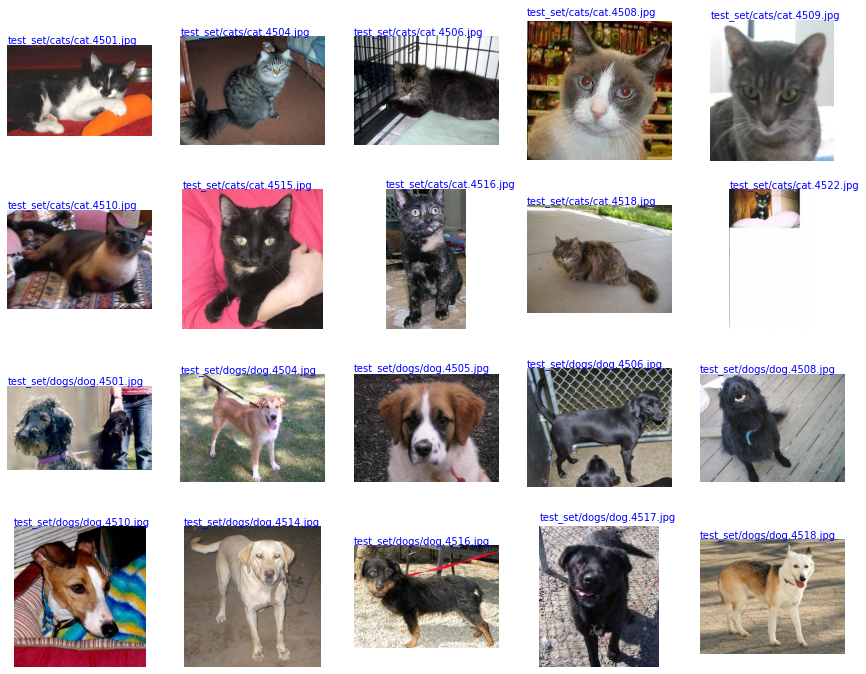

In [ ]:
#plotando as imagens classificadas erradas        
f = plt.figure(figsize=(15,15))
for i in range(20):
  f.add_subplot(5,5,i+1)

  img_path = os.path.join(test_dir,test_generator.filenames[error_prediction[i]])
  img=cv2.imread(img_path,1)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  #img=cv2.resize(img,(28,28)) 
  plt.imshow(img)


  #plt.imshow(QX[error_prediction[i]], cmap="gray")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.axis("off");
  plt.text(0,-7,"test_set/"+test_generator.filenames[error_prediction[i]],color="b")
  #plt.text(20,-3,class_names[QP[error_prediction[i]]],color="r")
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/resultado_transf.png")   
plt.show()